# ERE2023-24: Quiz 3 - Quasilinear utility

----------
- Leon Bremer - Vrije Universiteit Amsterdam & Tinbergen Institute
- Last updated on February 20, 2024
- Course: Environmental and Resource Economics (ERE) 2023-24 for MSc STREEM
- Objective: Quasilinear utility visualization
----------

This Jupyter (iPython) Notebook is to illustrate and support the tutorial material of week 3. Especially it visualizes the exercise on quasilinear utility in Quiz 3 of the Environmental and Resource Economics course in the STREEM Master at the Vrije Universiteit Amsterdam. This notebook is additional material in support of understanding the exercise.

This notebook is written in Python 3.

## Our quasilinear representative utility function

We have the following representative quasilinear utility function. We consider the agents (consumers) in this economy to be representative for the population and they experience utility according to function $u(e,h)$
$$u(e,h) = e + \sqrt{2h+1}$$
where $e$ are entertainment and $h$ are heating units.

We further have two types of agents, rich and poor, with income levels $m^r$ and $m^p$ respectively, with $m^r>m^p$. Also, $p^g$ is the price of good $g$, with $p^e>p^h$ throughout the exercise.

## Plot the utility function

Part of the code is based on the examples in Jake Vanderplas's [Python Data Science Handbook, 2016](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html).

In [1]:
# Import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Parameters

# prices and budgets
pe = 8# price entertainment
ph = 3# price heating
mr = 30# budget rich individual
mp = 6# budget poor individual

# Initiate the ranges of e, h for which we want to plot u
e = np.linspace(0, 5, 50)
h = np.linspace(0, 15, 50)
# Link these ranges into a grid.
E, H = np.meshgrid(e, h)

In [3]:
# Define our utility function
def u(e,h):
    """
    Our quasilinear representative utility function.
    """
    utility = e + (2*h + 1)**.5
    return utility

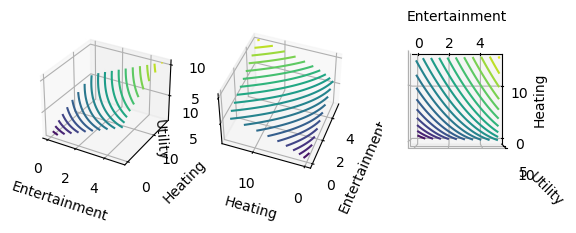

In [4]:
# Plot E, H and resulting utility in 3D
fig = plt.figure()
ax0 = fig.add_subplot(131,projection='3d')
ax1 = fig.add_subplot(132,projection='3d')
ax2 = fig.add_subplot(133,projection='3d')
for ax in (ax0,ax1,ax2):
    ax.contour3D(E, H, u(E, H), 20)
    ax.set_xlabel('Entertainment')
    ax.set_ylabel('Heating')
    ax.set_zlabel('Utility')
ax1.view_init(45, 200)
ax2.view_init(90, 270)
plt.show()

Above the utility curves are plotted in three dimensions. Utility is expressed on the vertical axis and the input are on the horizontal axes. In order to better view the structure two different perspectives are plotted. Other than the perspective, the plots are identical.

What you should notice is that the distance between utility curves in the entertainment-direction is constant. Looking back at the utility function, this should make sense since $u$ is linear in $e$. There is even a one-for-one relationship between $e$ and $u$. In the heating-direction the utility function is not linear and the square root causes there to be diminishing returns to $h$, meaning that you need to consume ever more $h$ to increase $u$ with one unit.

### 2D projections we are familiar with

Instead we can "project" the 3D function on the two dimensions of the inputs and indicate with color and number the level (height) of $u$. These are the indifference curves we are familiar with.

In [5]:
# Highest utility level to plot
Uceil = math.ceil(np.max(u(E, H)))+1

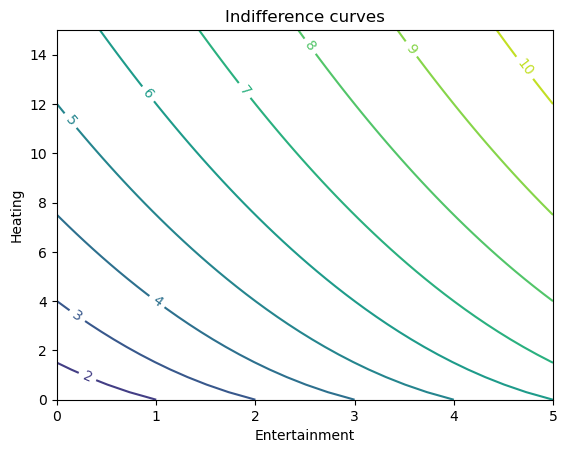

In [6]:
# Plot
fig, ax = plt.subplots()
CS = ax.contour(e, h, u(E, H), levels=range(0,Uceil))
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Indifference curves')
plt.xlabel('Entertainment')
plt.ylabel('Heating')
plt.show()

## Add the budget constraint

The consumer faces a constraint optimization problem. They want to maximize utility, but they are bounded by their budget. Also, the choice between heating and entertainment is driven by the relative prices. So let us add some budget constraints to the above plot.

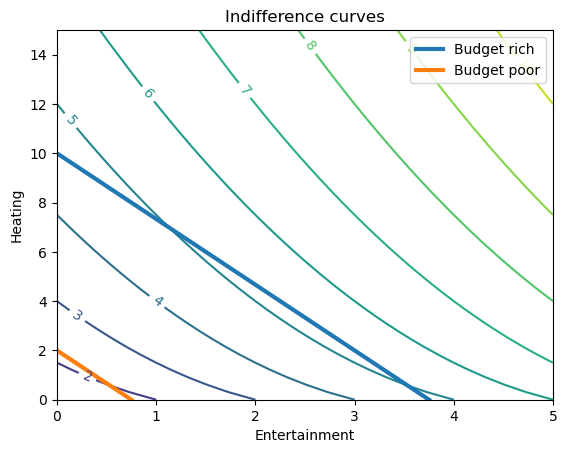

In [7]:
# Plot
fig, ax = plt.subplots()
CS = ax.contour(e, h, u(E, H), levels=range(0,Uceil))
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Indifference curves')
plt.plot([mr/pe,0],[0,mr/ph], lw=3, label='Budget rich')
plt.plot([mp/pe,0],[0,mp/ph], lw=3, label='Budget poor')
plt.legend()
plt.xlabel('Entertainment')
plt.ylabel('Heating')
plt.show()

### Mind the corners!

From the above plot one can see that the rich individual can reach a utility level of somewhere between 5 and 6. The poor individual reaches a utility level of between 2 and 3. You can calculate these levels yourself. Normally one would maximize $u$ under the budget constraint $m$. This could be done by setting up the following Lagrangian
$$\mathcal{L} = e + \sqrt{2h+1} + \lambda(m-e p_e - h p_h)$$
and taking the first-order conditions with respect to the choice variables $e$ and $h$.

Note that this will not always provide you with a sensible, and correct, answer. The problem arises when the optimal consumption basket is out of bounds, i.e. when optimal heating or entertainment is beyond its allowed, or sensible, bounds. E.g. when the individual would like to consume a negative amount of entertainment in order to consume more heating. This is not allowed in our model, as consumers cannot borrow or sell (or forego) entertainment units they do not have.

This can nicely be observed in the last plot (with some imagination), where we see that the rich individual's budget line is tangent to a utility indifference curve at a point where both $e$ and $h$ are positive. But the poor individual's budget curve would only be tangent to a utility indifference curve at $e<0$. And this is not allowed. So the solution to the poor individual's utility maximization problem is to spend their entire budget on heating. This is a corner solution.

Let's visualize the optimums.

In [8]:
# Optimums (which follow from the above optimization problem)
def estar(m, ph, pe):
    """
    Returns the optimal internal solution for e.
    Note that this might be not allowed (e.g. e<0).
    """
    out = (m + .5*ph)/pe - pe/(2*ph)
    return out

def hstar(ph, pe):
    """
    Returns the optimal internal solution for h.
    """
    out = .5*((pe/ph)**2-1)
    return out

def m_cutoff(ph, pe):
    """
    Returns the income level at which the consumer stops consuming e.
    """
    out = (pe**2 - ph**2) / (2*ph)
    return out

def optimum(m, ph, pe):
    """
    Returns the optimal basket and utility, taking into account
    what is allowed.
    """
    # For low m, only heating is consumed.
    if m<m_cutoff(ph, pe):
        e = 0
        h = m/ph
    else:
        e = estar(m, ph, pe)
        h = hstar(ph, pe)
    return (h, e, u(e, h))

# Rich and poor optimal basket and utility
(hstar_rich, estar_rich, u_rich) = optimum(mr, ph, pe)
(hstar_poor, estar_poor, u_poor) = optimum(mp, ph, pe)

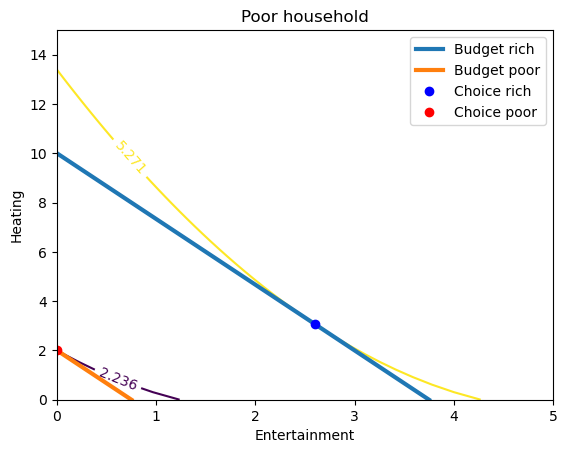

In [9]:
# Plot - only relevant utility curves
fig, ax = plt.subplots()
CS = ax.contour(e, h, u(E, H), levels=[u_poor, u_rich])
ax.clabel(CS, inline=True, fontsize=10)
ax.plot([mr/pe,0],[0,mr/ph], lw=3, label='Budget rich')
ax.plot([mp/pe,0],[0,mp/ph], lw=3, label='Budget poor')
ax.plot(estar_rich, hstar_rich, 'bo', label='Choice rich')
ax.plot(estar_poor, hstar_poor, 'ro', label='Choice poor')
ax.legend()
ax.set_title('Optimal consumption baskets under constraints')
ax.title.set_text('Poor household')
ax.set_xlabel('Entertainment')
ax.set_ylabel('Heating')
plt.show()

## Emissions or energy tax

When introducing a tax on emissions or energy, the budget lines will tilt, as the relative prices of the goods change. Let's see what happens.

In [10]:
# Tax
tax_h = 1

# Rich and poor POST-TAX optimal basket and utility
(hstar_rich_tax, estar_rich_tax, u_rich_tax) = optimum(mr, ph+tax_h, pe)
(hstar_poor_tax, estar_poor_tax, u_poor_tax) = optimum(mp, ph+tax_h, pe)

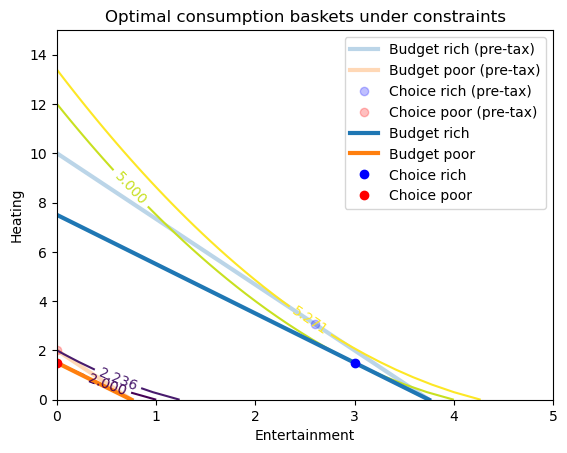

In [11]:
# Plot - only relevant utility curves
fig, ax = plt.subplots()
ax.plot([mr/pe,0],[0,mr/ph], lw=3, label='Budget rich (pre-tax)', alpha=.3, color='tab:blue')
ax.plot([mp/pe,0],[0,mp/ph], lw=3, label='Budget poor (pre-tax)', alpha=.3, color='tab:orange')
ax.plot(estar_rich, hstar_rich, 'bo', label='Choice rich (pre-tax)',alpha=.25)
ax.plot(estar_poor, hstar_poor, 'ro', label='Choice poor (pre-tax)',alpha=.25)
CS = ax.contour(e, h, u(E, H), levels=[u_poor_tax, u_poor, u_rich_tax, u_rich])
ax.clabel(CS, inline=True, fontsize=10)
ax.plot([mr/pe,0],[0,mr/(ph+tax_h)], lw=3, label='Budget rich', color='tab:blue')
ax.plot([mp/pe,0],[0,mp/(ph+tax_h)], lw=3, label='Budget poor', color='tab:orange')
ax.plot(estar_rich_tax, hstar_rich_tax, 'bo', label='Choice rich')
ax.plot(estar_poor_tax, hstar_poor_tax, 'ro', label='Choice poor')
ax.legend()
ax.set_xlabel('Entertainment')
ax.set_ylabel('Heating')
ax.set_title('Optimal consumption baskets under constraints')
plt.show()

Both individuals see their utility levels diminished from the tax. This is clear, as the consumers only care about consuming $e$ and $h$, and with $h$ becoming more expensive, this must have a non-positive effect on utility. Note that utility levels of both consumers change with about the same level (see numbers in labels). But percentage-wise the poor individual takes a larger hit to utility. (It might be hard to read the plot's bottom left corner as it is a bit crowded. But the poor individual's budget tilts left and they can consume less heating, while still not consuming any entertainment.)

Note something peculiar about the heating consumption of the two consumer types? They both consume the same level of heating. This is because at these prices, both are at an internal (and not corner) solution. Why does the rich consumer not consume more heating? This is because of the quasilinear utility function. Remember from the utility function and the indifference curves plots that utility is linear in $e$. This means that the slope of the utility indifference curve does not change when you move along the $e$-dimension. (Otherwise the indifference curves cannot maintain equal distance from each other over the $e$-dimension!) So, when income increases for a consumer who is not in a corner solution, i.e. at $e>0$, all additional income will be spent on entertainment. This makes the quasilinear utility function a good function to represent the choices between a necessary and a regular (or luxury) good.

### Revenue recycling

What happens if the tax revenue gets fully recycled? Here I show the case where the tax income is given back to every consumer in the form of a lumpsum transfer.

I make one important assumption, in order to make this policy suggestion easier to solve, namely I assume that after the recycling the poor individual consumes entertainment. Also I consider a share $0<s_r<1$ to be of the rich consumer type.

In [12]:
# Set s_r
sr = .5

# Tax revenue per consumer
transfer = hstar(ph+tax_h, pe)*tax_h

# Outcomes in case of tax AND lumpsum transfers
(hstar_rich_tax_transfer, estar_rich_tax_transfer, u_rich_tax_transfer) = optimum(mr+transfer, ph+tax_h, pe)
(hstar_poor_tax_transfer, estar_poor_tax_transfer, u_poor_tax_transfer) = optimum(mp+transfer, ph+tax_h, pe)

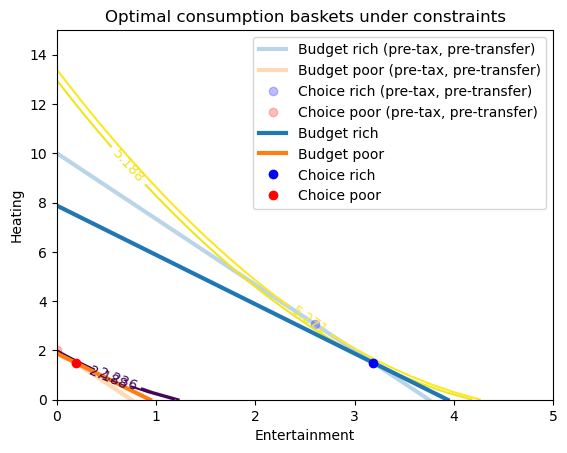

In [13]:
# Plot - Tax and transfer
fig, ax = plt.subplots()
ax.plot([mr/pe,0],[0,mr/ph], lw=3, label='Budget rich (pre-tax, pre-transfer)', alpha=.3, color='tab:blue')
ax.plot([mp/pe,0],[0,mp/ph], lw=3, label='Budget poor (pre-tax, pre-transfer)', alpha=.3, color='tab:orange')
ax.plot(estar_rich, hstar_rich, 'bo', label='Choice rich (pre-tax, pre-transfer)',alpha=.25)
ax.plot(estar_poor, hstar_poor, 'ro', label='Choice poor (pre-tax, pre-transfer)',alpha=.25)
CS = ax.contour(e, h, u(E, H), levels=[u_poor_tax_transfer, u_poor, u_rich_tax_transfer, u_rich])
ax.clabel(CS, inline=True, fontsize=10)
ax.plot([(mr+transfer)/pe,0],[0,(mr+transfer)/(ph+tax_h)], lw=3, label='Budget rich', color='tab:blue')
ax.plot([(mp+transfer)/pe,0],[0,(mp+transfer)/(ph+tax_h)], lw=3, label='Budget poor', color='tab:orange')
ax.plot(estar_rich_tax_transfer, hstar_rich_tax_transfer, 'bo', label='Choice rich')
ax.plot(estar_poor_tax_transfer, hstar_poor_tax_transfer, 'ro', label='Choice poor')
ax.legend()
ax.set_title('Optimal consumption baskets under constraints')
ax.set_xlabel('Entertainment')
ax.set_ylabel('Heating')
plt.show()

As it is quite impossible to see what happened to utility levels, here are the numbers.

In [14]:
def percent_change(before,after):
    change = round(((after/before)-1)*100,2)
    out = str(change)+"%"
    return out

print("The poor individual's utiltiy")
print("Before:            ", u_poor)
print("After (tax only):  ", u_poor_tax)
print("% loss             ", percent_change(u_poor,u_poor_tax))
print("After (transfer):  ", u_poor_tax_transfer)
print("% loss             ", percent_change(u_poor,u_poor_tax_transfer))
print("-------------------")
print("The rich individual's utiltiy")
print("Before:            ", u_rich)
print("After (tax only):  ", u_rich_tax)
print("% loss             ", percent_change(u_rich,u_rich_tax))
print("After (transfer):  ", u_rich_tax_transfer)
print("% loss             ", percent_change(u_rich,u_rich_tax_transfer))

The poor individual's utiltiy
Before:             2.23606797749979
After (tax only):   2.0
% loss              -10.56%
After (transfer):   2.1875
% loss              -2.17%
-------------------
The rich individual's utiltiy
Before:             5.270833333333334
After (tax only):   5.0
% loss              -5.14%
After (transfer):   5.1875
% loss              -1.58%


A policy without transfer disproportionately (in percentage terms) hurts the poorer individual. The transfer helps spread the losses nearly evenly.